# **Study Tribes Social Network**
Undirected graph, signed network

In [ ]:
#import all nedded libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib.colors as mcolors
import community as c

In [ ]:
def draw(G, measures, measure_name):
    pos = nx.spring_layout(G)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')

# **Reading edges file and assign names to the columns**

In [ ]:
df=pd.read_csv('TripesEvsF.text', names=['a','b','sign'])

In [ ]:
df.head()

,a,b,sign
0,1,2,1
1,1,3,-1
2,2,3,-1
3,1,4,-1
4,3,4,1


Note: The numbers in the sign columns refers to
* 1 alliance
-1 enmity

# **Type of data**

In [ ]:
df.dtypes

a       int64
b       int64
sign    int64
dtype: object

In [ ]:
G = nx.from_pandas_edgelist(df, source='a', target='b',edge_attr='sign')

**General Info**

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 16
Number of edges: 58
Average degree:   7.2500


In [ ]:
df.describe()

,a,b,sign
count,58.000000,58.000000,58.000000
mean,6.396552,11.103448,0.000000
std,4.077924,4.115395,1.008734
min,1.000000,2.000000,-1.000000
25%,2.250000,8.000000,-1.000000
50%,6.000000,12.000000,0.000000
75%,9.750000,15.000000,1.000000
max,15.000000,16.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       58 non-null     int64
 1   b       58 non-null     int64
 2   sign    58 non-null     int64
dtypes: int64(3)
memory usage: 1.5 KB


In [ ]:
nx.average_clustering(G)

0.5391865079365079

In [ ]:
print(nx.is_connected(G))

True


In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.48333333333333334


In [ ]:
nx.average_shortest_path_length(G)

1.5416666666666667

In [ ]:
nx.diameter(G)

3

In [ ]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.5271317829457365


# **Network degree analysis**

Average degree =  7.25
Median degree =  7.5
Min degree =  3
Max degree =  10


Text(0.5, 0, 'Degree')

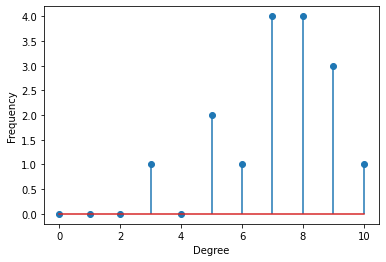

In [ ]:
degree_sequence = list(G.degree())
print("Average degree = ", np.mean(np.array(degree_sequence)[:,1]))
print("Median degree = ", np.median(np.array(degree_sequence)[:,1]))
print("Min degree = ", np.min(np.array(degree_sequence)[:,1]))
print("Max degree = ", np.max(np.array(degree_sequence)[:,1]))

degree_freq = np.array(nx.degree_histogram(G))
plt.stem(degree_freq,use_line_collection=True)
plt.ylabel("Frequency")
plt.xlabel("Degree")

Text(0.5, 0, 'Degree')

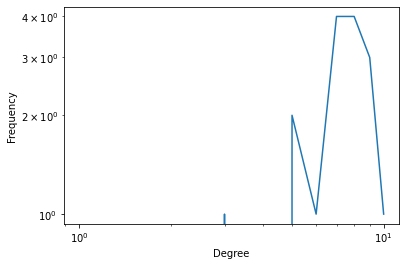

In [ ]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(6,4)) 
plt.loglog(degrees[:], degree_freq[:]) 
plt.ylabel('Frequency')
plt.xlabel('Degree')

# **Network visualization**

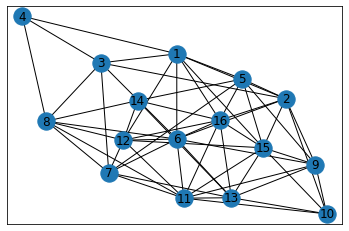

In [ ]:
nx.draw_networkx(G)

{(1, 2): Text(0.2403137816567755, -0.015184541134989335, '1'),
 (1, 3): Text(0.4884118141120477, 0.1674125889878018, '-1'),
 (1, 4): Text(0.7255043045755825, 0.0795704834454925, '-1'),
 (1, 5): Text(0.31164532888719604, -0.20275032587505668, '-1'),
 (1, 6): Text(0.1968810124925033, 0.04580525717547199, '-1'),
 (1, 12): Text(0.2496059728572503, -0.14048279386144646, '-1'),
 (1, 15): Text(0.07583206393125577, -0.15525052968858696, '1'),
 (1, 16): Text(0.16991219252355183, -0.2507634064340155, '1'),
 (2, 3): Text(0.27771698661765837, 0.2562376961336669, '-1'),
 (2, 5): Text(0.10095050139280673, -0.11392521872919154, '-1'),
 (2, 6): Text(-0.013813815001886002, 0.13463036432133713, '-1'),
 (2, 9): Text(-0.21047291517508784, 0.16452801842023115, '-1'),
 (2, 10): Text(-0.36100447457141277, 0.13740223469279306, '-1'),
 (2, 15): Text(-0.13486276356313354, -0.06642542254272182, '1'),
 (2, 16): Text(-0.040782634970837485, -0.16193829928815037, '1'),
 (3, 4): Text(0.7629075095364652, 0.35099272071

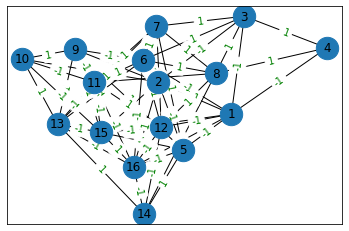

In [ ]:
pos=nx.spring_layout(G) 
nx.draw_networkx(G,pos, node_size=500)
labels = nx.get_edge_attributes(G,'sign')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.5, font_size=10, font_color='g')

In [ ]:
nx.degree(G)

DegreeView({1: 8, 2: 8, 3: 6, 4: 3, 5: 7, 6: 10, 7: 7, 8: 7, 9: 7, 10: 5, 11: 9, 12: 8, 13: 8, 14: 5, 15: 9, 16: 9})

In [ ]:
nx.clustering(G)

{1: 0.5,
 2: 0.5357142857142857,
 3: 0.5333333333333333,
 4: 0.6666666666666666,
 5: 0.42857142857142855,
 6: 0.4888888888888889,
 7: 0.47619047619047616,
 8: 0.47619047619047616,
 9: 0.6190476190476191,
 10: 0.8,
 11: 0.5555555555555556,
 12: 0.5357142857142857,
 13: 0.5,
 14: 0.4,
 15: 0.5555555555555556,
 16: 0.5555555555555556}

In [ ]:
sorted(nx.connected_components(G))

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}]

In [ ]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 12), (1, 15), (1, 16), (2, 3), (2, 5), (2, 6), (2, 9), (2, 10), (2, 15), (2, 16), (3, 4), (3, 6), (3, 7), (3, 8), (4, 8), (5, 7), (5, 9), (5, 14), (5, 15), (5, 16), (6, 7), (6, 8), (6, 9), (6, 11), (6, 12), (6, 13), (6, 16), (7, 8), (7, 11), (7, 12), (7, 13), (8, 11), (8, 12), (8, 14), (9, 10), (9, 11), (9, 13), (9, 15), (10, 11), (10, 13), (10, 15), (11, 12), (11, 13), (11, 15), (11, 16), (12, 14), (12, 15), (12, 16), (13, 14), (13, 15), (13, 16), (14, 16), (15, 16)])

In [ ]:
nx.edge_connectivity(G)

3

In [ ]:
print(nx.eccentricity(G))

{1: 2, 2: 2, 3: 2, 4: 3, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 2, 12: 2, 13: 3, 14: 2, 15: 2, 16: 2}


In [ ]:
nx.center(G)

[1, 2, 3, 5, 6, 7, 8, 11, 12, 14, 15, 16]

# **Community structure** 

Number of Tribal Groups =  3
Modularity =  0.16899524375743163


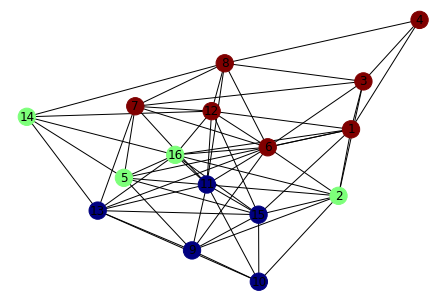

In [ ]:
parts = c.best_partition(G)
print('Number of Tribal Groups = ', len(set(parts.values())))
print('Modularity = ', c.modularity(parts,G))

values = [parts.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color=values, with_labels=True)

# **Centrality measures**

In [ ]:
nx.degree_centrality(G)

{1: 0.5333333333333333,
 2: 0.5333333333333333,
 3: 0.4,
 4: 0.2,
 5: 0.4666666666666667,
 6: 0.6666666666666666,
 7: 0.4666666666666667,
 8: 0.4666666666666667,
 9: 0.4666666666666667,
 10: 0.3333333333333333,
 11: 0.6,
 12: 0.5333333333333333,
 13: 0.5333333333333333,
 14: 0.3333333333333333,
 15: 0.6,
 16: 0.6}

In [ ]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

1 0.07501133786848073
6 0.07198412698412697
8 0.06296296296296297
11 0.057101284958427825
2 0.05247165532879819
15 0.04637566137566137
13 0.042947845804988664
16 0.03892668178382464
5 0.03484126984126985
12 0.03263038548752835
7 0.03243386243386243
3 0.032275132275132276
9 0.01691609977324263
14 0.01597883597883598
10 0.00380952380952381
4 0.002380952380952381


In [ ]:
most_popular = nx.degree_centrality(G)

for w in sorted(most_popular, key=most_popular.get, reverse=True):
    print(w, most_popular[w])

6 0.6666666666666666
11 0.6
15 0.6
16 0.6
1 0.5333333333333333
2 0.5333333333333333
12 0.5333333333333333
13 0.5333333333333333
5 0.4666666666666667
7 0.4666666666666667
8 0.4666666666666667
9 0.4666666666666667
3 0.4
10 0.3333333333333333
14 0.3333333333333333
4 0.2


In [ ]:
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

[(6, 10), (11, 9), (15, 9), (16, 9), (1, 8), (2, 8), (12, 8), (13, 8), (5, 7), (7, 7), (8, 7), (9, 7), (3, 6), (10, 5), (14, 5), (4, 3)]


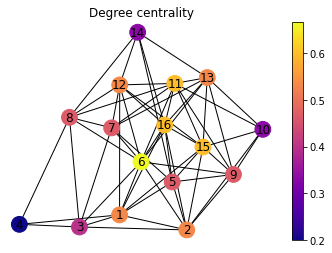

In [ ]:
draw(G, nx.degree_centrality(G), 'Degree centrality')

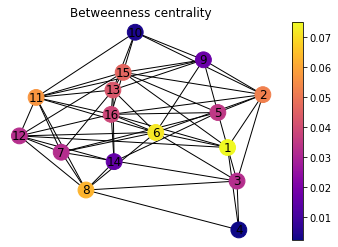

In [ ]:
draw(G, nx.betweenness_centrality(G), 'Betweenness centrality')

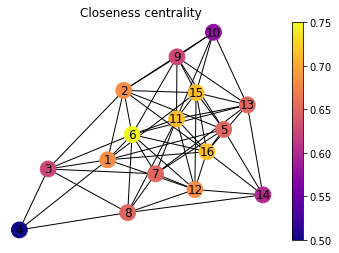

In [ ]:
draw(G, nx.closeness_centrality(G), 'Closeness centrality')